In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [15]:
data = pd.read_csv("pov_12.csv", sep=' ', header = None)
print(data.shape)
print(data.head(3))

(150, 3)
          0         1         2
0  0.109393  0.085409  Cluster1
1  0.082571  0.101796  Cluster1
2  0.084990  0.113641  Cluster1


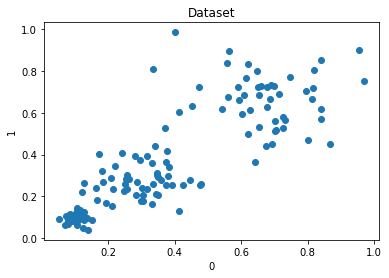

In [16]:
plt.scatter(data[0], data[1])
plt.title('Dataset')
plt.xlabel('0')
plt.ylabel('1')
plt.show()

In [17]:
X_train = data[[0,1]]

In [18]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(X_train)

GaussianMixture(n_components=3)

In [19]:
print(gmm.weights_)

[0.331937   0.33311571 0.33494729]


In [20]:
print(gmm.means_)

[[0.10285258 0.09881388]
 [0.66762332 0.66211227]
 [0.29703642 0.27366172]]


In [21]:
print(gmm.covariances_)

[[[ 3.65688759e-04  3.23065489e-05]
  [ 3.23065489e-05  4.19691071e-04]]

 [[ 1.85212778e-02 -1.45123928e-03]
  [-1.45123928e-03  1.76824209e-02]]

 [[ 7.53728471e-03  5.83441415e-04]
  [ 5.83441415e-04  5.64783281e-03]]]


In [22]:
types = gmm.predict(X_train)

In [24]:
X_now = [[0.1, 0.1], [0.8, 0.8], [0.4, 0.4]]
y_now = gmm.predict(X_now)
y_now

array([0, 1, 2], dtype=int64)

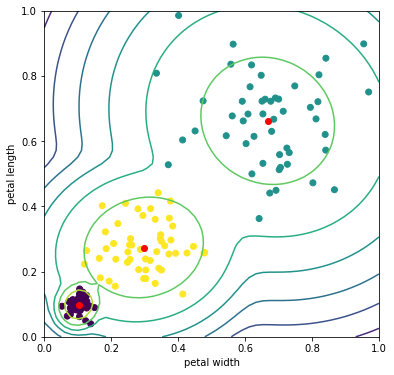

In [25]:
#ve ra cac luoi the hien 1 std, 2std
plt.figure(figsize=(6,6))
X, Y = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))
XX = np.array([X.ravel(), Y.ravel()]).T # ma tran [[x,y]] ~ X_train
Z = gmm.score_samples(XX) # tao ngau nhien cac diem theo gmm
Z = Z.reshape((50, 50))
plt.contour(X, Y , Z)

#Ve cac y chinh cac diem du lieu va trung tam cum
plt.scatter(X_train[0], X_train[1], c = types)
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], color = 'red')
plt.xlabel("petal width")
plt.ylabel("petal length")
plt.show()